## 可視化

この資料は[The Python Tutorial](https://docs.python.org/3.6/tutorial/index.html#the-python-tutorial)
    ([日本語版](https://docs.python.jp/3/tutorial/)) および [Python for Data Analysis:Wrangling with Pandas, Numpy and IPython](http://shop.oreilly.com/product/0636920050896.do)を参考に作成した。  

可視化はデータ解析にとって最も重要な仕事の一つ。
[matrplotlib](https://matplotlib.org) は出版品質の可視化を目的に設計されたパッケージである。  
matrplotlib は多くの**ベクトル・ラスタ画像形式**をサポートしている。

matplotlib の出力を jupyter notebook に表示させるには、以下の magic command を実行しておく:

In [1]:
%matplotlib notebook

あるいは、以下の方法もある:
```Python
%matplotlib inline
```

### matolotlib API の手引き

matplotlib を import するには:
```Python
import matplotlib.pyplot as plt
```

簡単にリストをプロットしてみると:

<IPython.core.display.Javascript object>


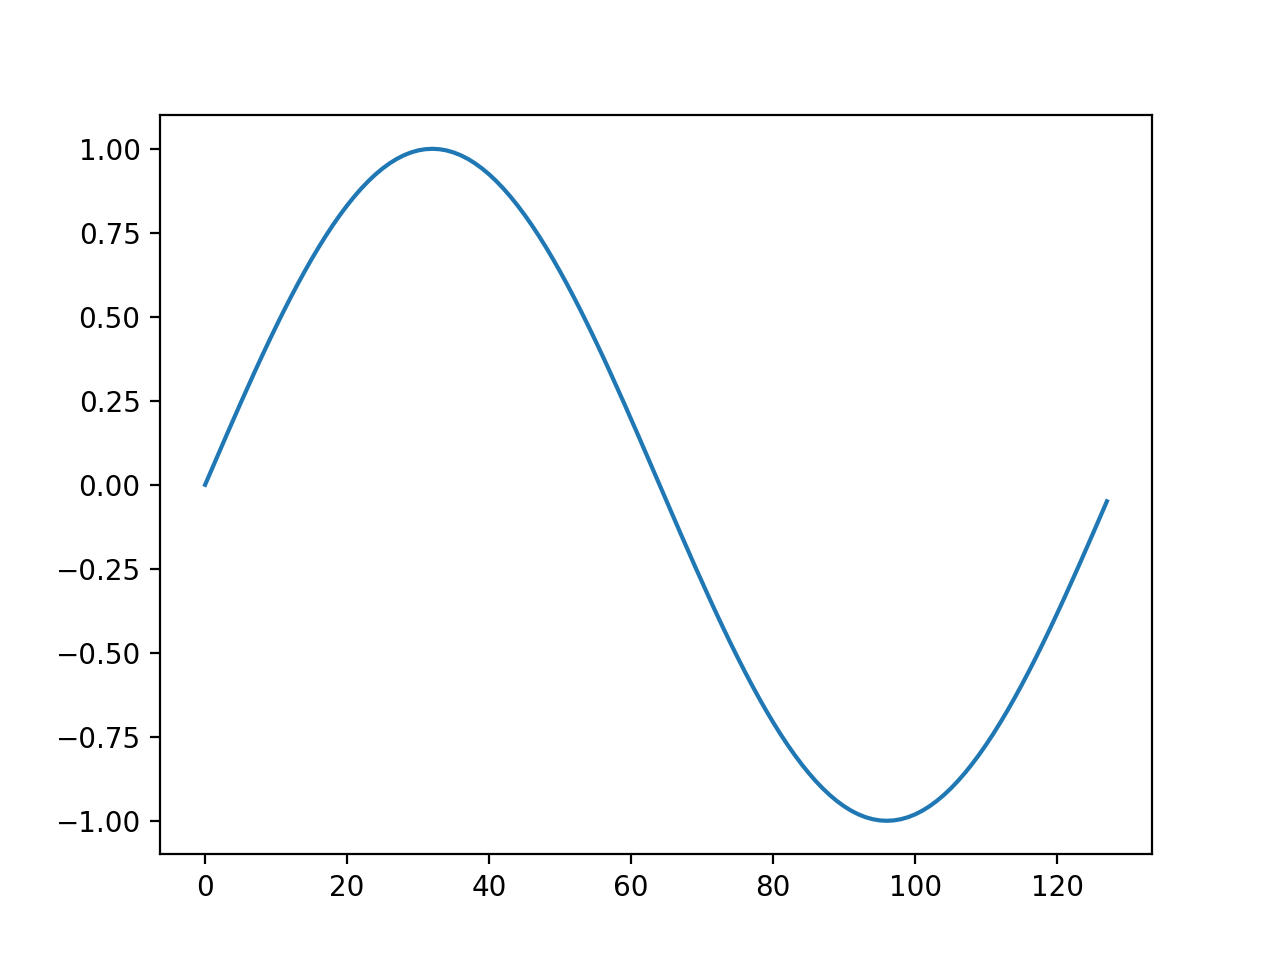

In [2]:
import matplotlib.pyplot as plt
from math import sin, pi
import numpy as np

data = [sin(x) for x in np.arange(0,2*pi, pi / 64)]
plt.plot(data)
plt.show()

## Figure と Subplot(s)

matplotlib の Plot は Figure オブジェクトに置かれる。  
新しい Figure オブジェクトを生成するには　`plt.figure()` を使う。  
`plt.figure()` には多くのオプションがある、とくに `figsize` は特定のサイズ、アスペクト比を得るには重要となる:

<IPython.core.display.Javascript object>


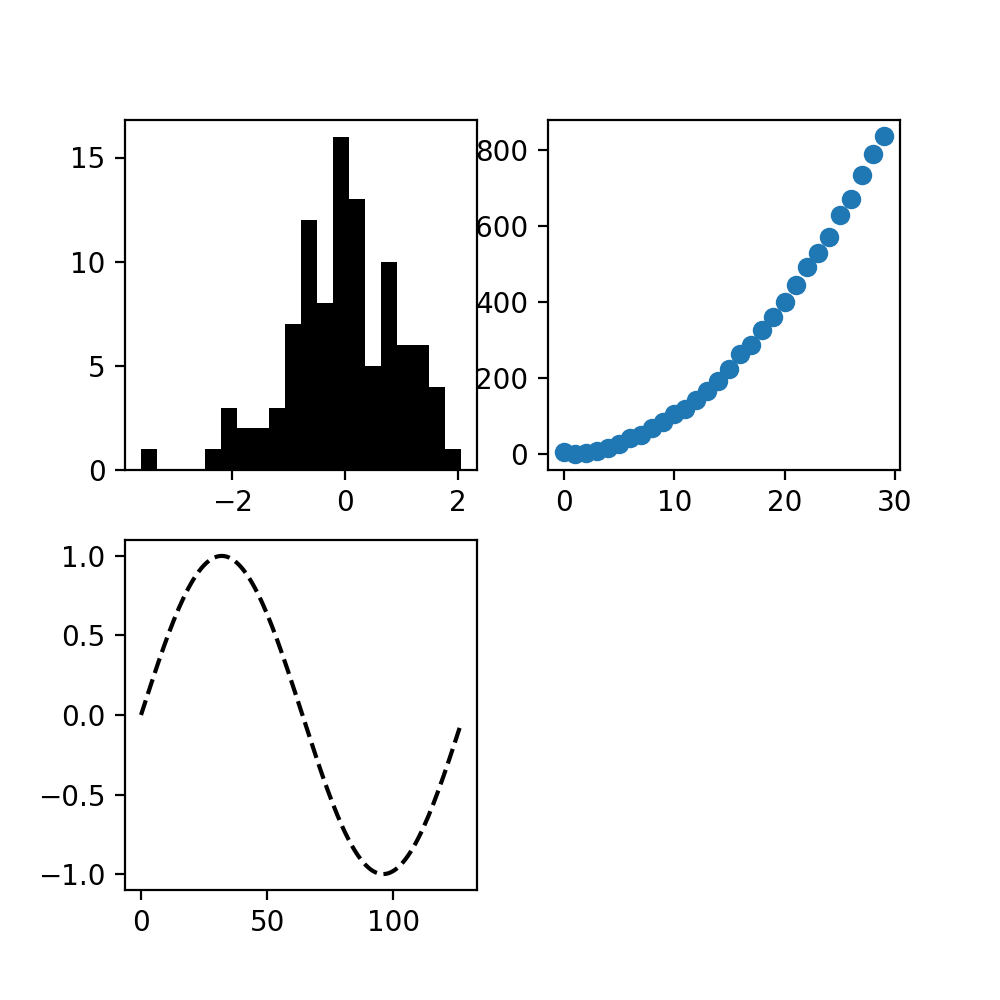

In [3]:
fig = plt.figure(figsize=(5,5))

空白の Figure にはなにもプロットできない。`add_subplot()` で一つ以上の Subplot を作成する必要がある:

In [4]:
ax1 = fig.add_subplot(2,2,1)

この意味は、Figure を 2x2 の 4 領域に分割、1 番目を選択するということ。
2 番目以降の Subplot の作成は:

In [5]:
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

`plt.plot()` は最後に作成した Subplot におこなわれる。ここで、`"k--"` は黒の破線 Style オプションを選択:

In [6]:
data = [sin(x) for x in np.arange(0,2*pi, pi / 64)]
plt.plot(data, "k--")

`fig.add_subplot()`は、`AxesSubplot` オブジェクトが返り値となる。
それぞれのメソッドで Subplot にプロットできる。ヒストグラムを `ax1` にプロットする場合は:

In [7]:
ax1.hist(np.random.randn(100), bins=20, color="black")

(array([ 1.,  0.,  0.,  0.,  1.,  3.,  2.,  2.,  3.,  7., 12.,  8., 16.,
        13.,  5., 10.,  6.,  6.,  4.,  1.]),
 array([-3.60959443, -3.32649519, -3.04339594, -2.7602967 , -2.47719745,
        -2.19409821, -1.91099896, -1.62789972, -1.34480047, -1.06170123,
        -0.77860198, -0.49550273, -0.21240349,  0.07069576,  0.353795  ,
         0.63689425,  0.91999349,  1.20309274,  1.48619198,  1.76929123,
         2.05239047]),
 <a list of 20 Patch objects>)

散布図の場合は:

In [8]:
ax2.scatter(np.arange(30), np.arange(30)**2 + 3 * np.random.randn(30))

既に紹介した、`plt.subplots` は Figure オブジェクトと、引数で指定された数の Subplot の配列が返される:

<IPython.core.display.Javascript object>


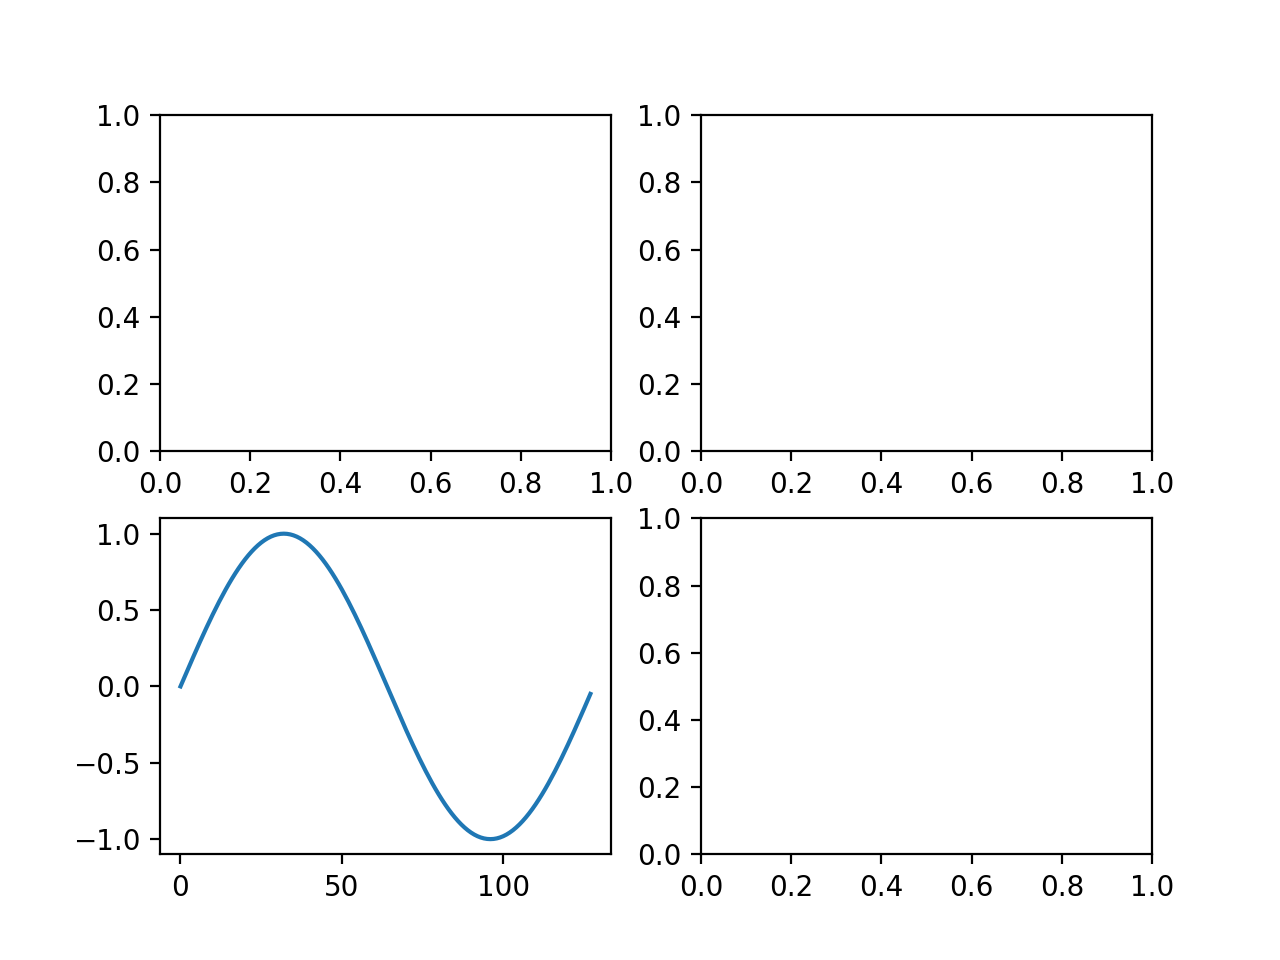

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112a91668>,
      dtype=object)

In [9]:
fig, axes = plt.subplots(2,2)
axes

ここで、Subplot の指定は、`axes` を2 次元配列として `axes[1,0]` のようにおこなう:

In [10]:
axes[1,0].plot(data)

In [11]:
axes[1,1].scatter(np.arange(10), np.arange(10)**2 + 10 * np.random.randn(10))

ちなみに、Subplot をクリアするには、`ax.clear()` メソッドが使える:

In [12]:
axes[1,1].clear()

## plot オプション
matplotlib の Plot には、線種、色、マーカーなどに多様なオプションが利用できる。
詳細は [matplotlib](https://matplotlib.org)  サイトを参考のこと。

`plot` では default で線形補間となっている:

In [13]:
data2 = np.random.randn(20)

<IPython.core.display.Javascript object>


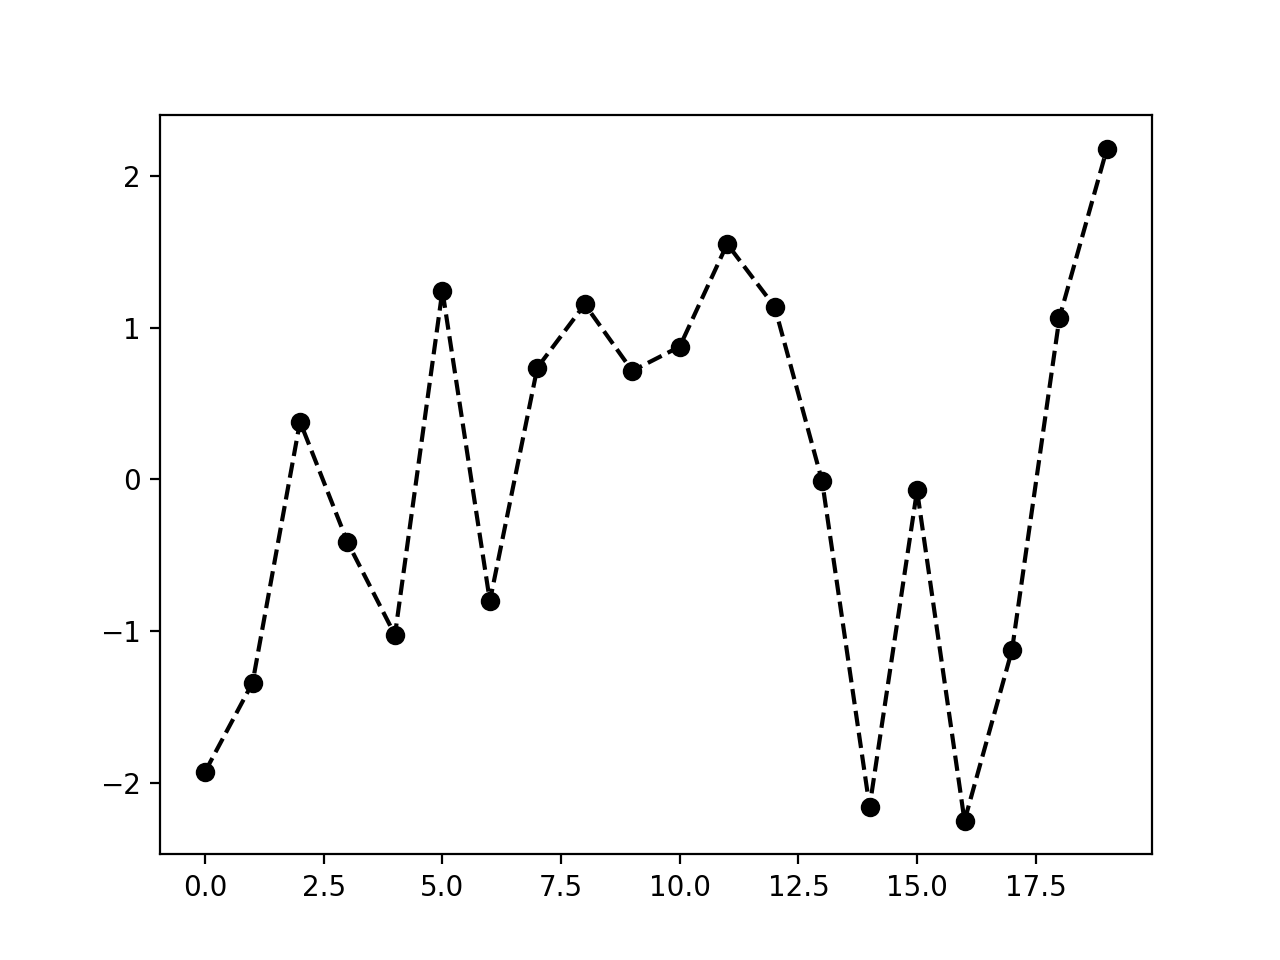

In [14]:
fig, ax = plt.subplots(1,1)
ax.plot(data2, marker="o", linestyle="--", color="black")

`drawstyle` オプションを `steps-post` とすると以下のようになる。例では、凡例を`legend()` を使って表示してある:

<IPython.core.display.Javascript object>


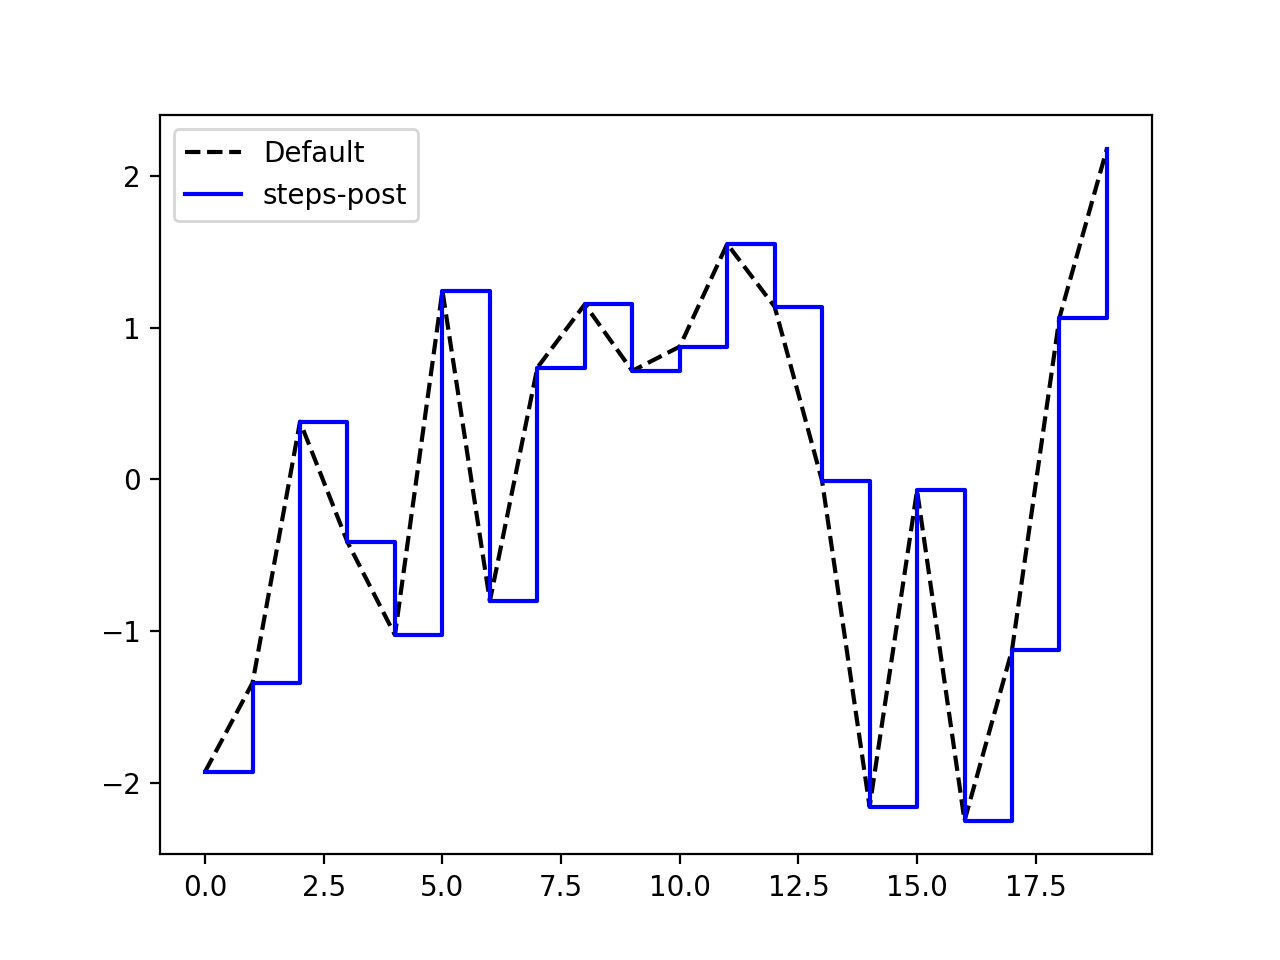

In [15]:
fix, ax = plt.subplots(1,1)
ax.plot(data2, color="black", linestyle="--", label="Default")
ax.plot(data2, color="blue", linestyle="-", drawstyle="steps-post", label="steps-post")
ax.legend()

## タイトル、軸ラベル、目盛り、目盛りラベル

以下の図を使って説明する:

<IPython.core.display.Javascript object>


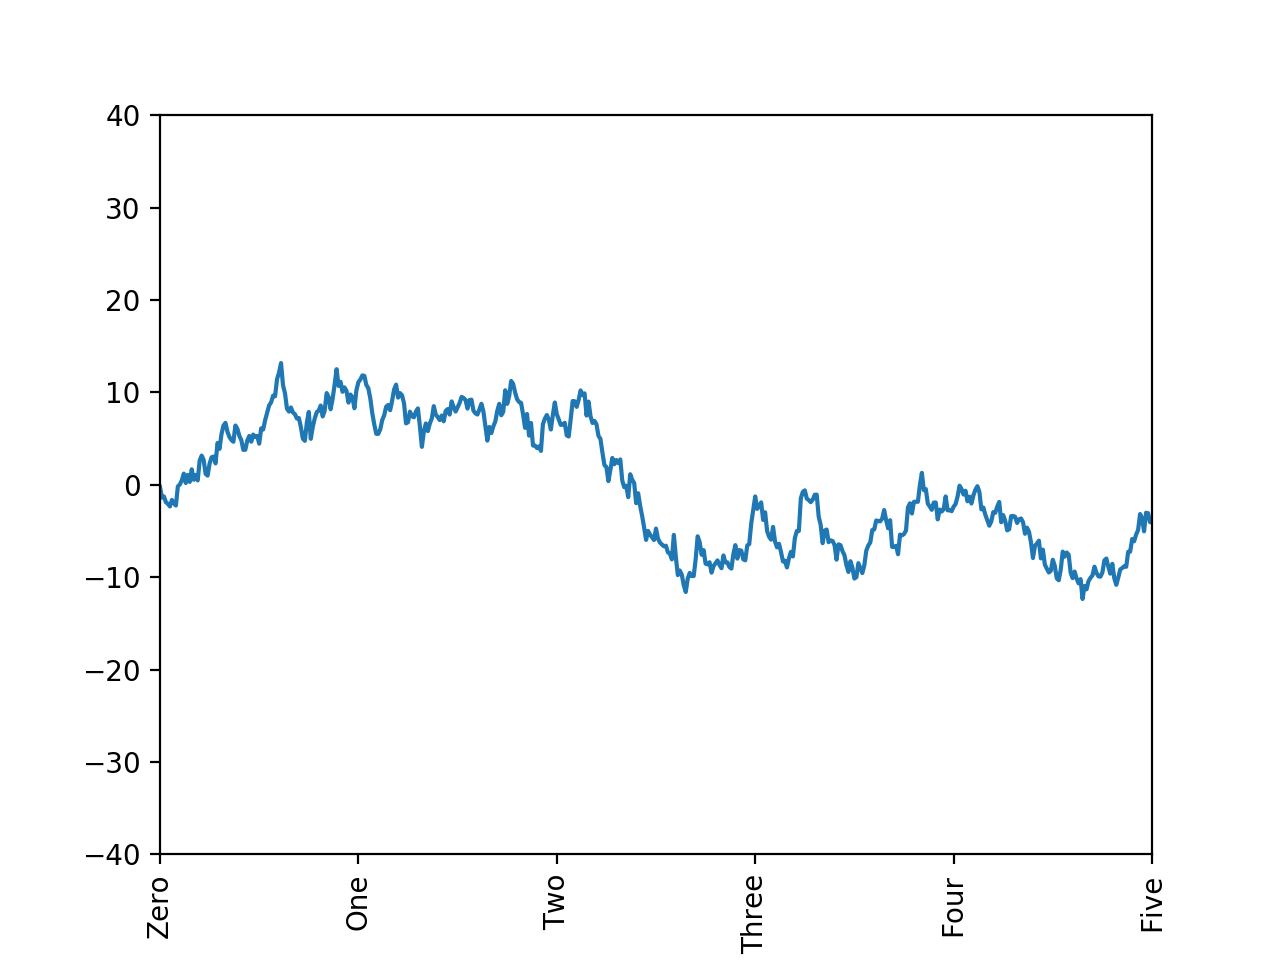

In [16]:
fig, ax = plt.subplots(1,1)
data3 = np.random.randn(1000).cumsum()
ax.plot(data3)

x, y 軸の範囲を指定するにはそれぞれ`ax.set_xlim()`,  `ax.set_ylim()`を利用する:

In [17]:
ax.set_xlim(0,500)
ax.set_ylim(-40,40)

(-40, 40)

軸目盛りの設定は `ax.set_xticks()` が利用できる:

In [18]:
ax.set_xticks([0,200,400])

`ax.set_xticklabels()`　を使ってラベルを軸目盛りに置き換えることもできる:

In [19]:
ax.set_xticks([0,100,200,300,400,500])
ax.set_xticklabels(["Zero", "One", "Two", "Three", "Four", "Five"], rotation=90)

[Text(0,0,'Zero'),
 Text(0,0,'One'),
 Text(0,0,'Two'),
 Text(0,0,'Three'),
 Text(0,0,'Four'),
 Text(0,0,'Five')]

プロットのタイトル、軸ラベルはそれぞれ、`ax.set_title()`, `ax.set_xlabel()`, `ax.set_ylabel()` で設定する:

<IPython.core.display.Javascript object>


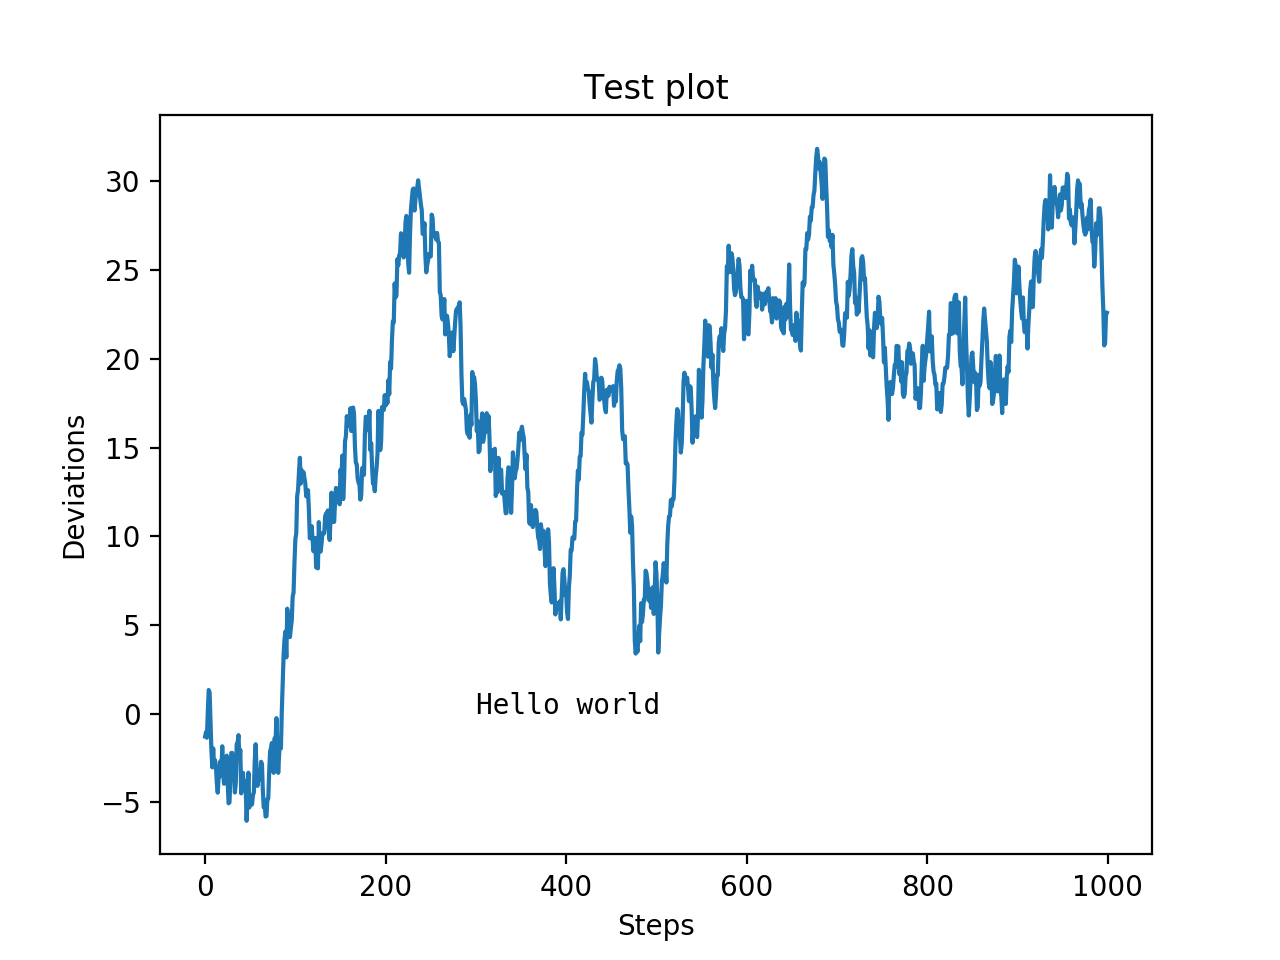

Text(0,0.5,'Deviations')

In [20]:
fig, ax = plt.subplots(1,1)
data3 = np.random.randn(1000).cumsum()
ax.plot(data3)
ax.set_title("Test plot")
ax.set_xlabel("Steps")
ax.set_ylabel("Deviations")

## 注釈

注釈やテキストをプロットに追加するには、`text`, `arrow`, `annotate` などが使える。
`ax.text()` は座標 `(x,y)`にテキストを描く:

In [21]:
ax.text(300, 0, "Hello world", family="monospace", fontsize=10)

Text(300,0,'Hello world')

`ax.annotate()` は矢印とテキストを描画する。使用例は `btc.ipynb` を参考にすると良い。

## 描画

matplotlib はプロットに描画できる多様な形状のオブジェクト、Patch と呼ばれる、を持っている。
単純なものは、matplotlib.pyplot に、より高度なものは matplotlib.patches に収められている。  
描画は、以下のようにまず Patch オブジェクトを作成し、`ax.addpatch()` によって subplot に貼り付ける:

<IPython.core.display.Javascript object>


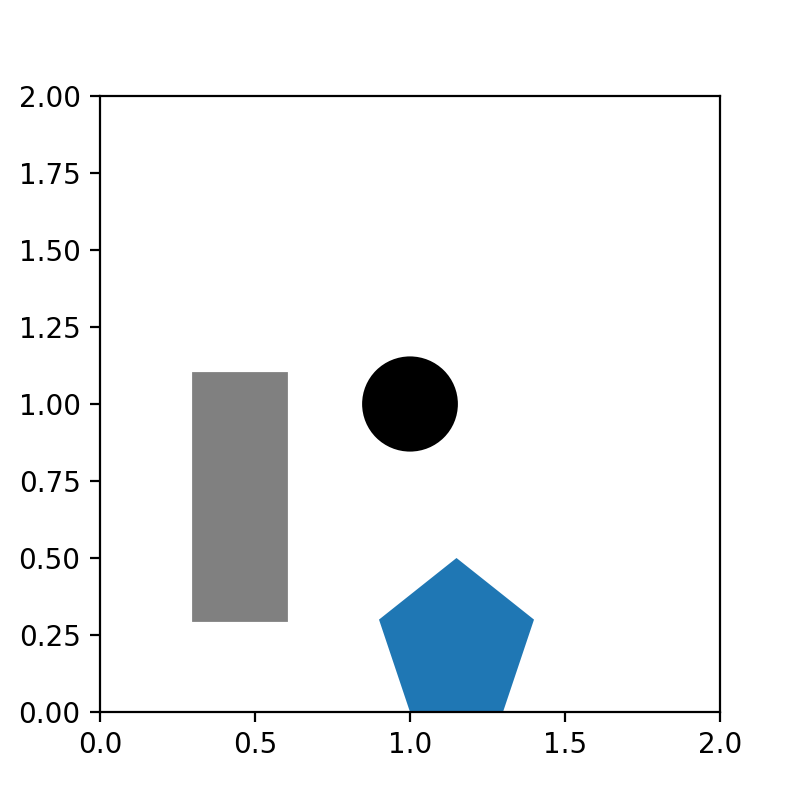

(0, 2)

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4,4)) # アスペクト比を 1:1 にする
circle = plt.Circle((1,1), 0.15, color="black")
rectangle = plt.Rectangle((0.3,0.3), 0.3,0.8, color="grey")
polygon=plt.Polygon([[1.0,0],[1.3,0],[1.4,0.3],[1.15,0.5],[0.9,0.3]])

ax.add_patch(rectangle)
ax.add_patch(circle)
ax.add_patch(polygon)
ax.set_xlim(0,2)
ax.set_ylim(0,2)


## 画像の保存

すでに説明したとおり画像ファイルの保存は、`plt.savefig()` によっておこなう。
SVG 形式で保存したい場合は:

In [23]:
plt.savefig("test.svg")

matplotlib は拡張子によって画像形式を推測している。つまり、PDF で保存したいはファイル名を `test.pdf` とすれば良い。

よく使うオプションとして、解像度を指定する `dpi` と、実画像の空白を削除する `bbox_inches` がある。
これらを指定して、PNG 形式で保存するには:

In [24]:
plt.savefig("test.svg", dpi=400, bbox_inches="tight")

`plt.savefig()` は必ずしもファイルを出力先とする必要はない、BytesIO のようにファイル-like オブジェクトでも良い:

In [25]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

ここで、`plot_data` には画像データが入っている:

In [26]:
plot_data

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01\x90\x08\x06\x00\x00\x00\x80\xbf6\xcc\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00\x009tEXtSoftware\x00matplotlib version 2.1.2, http://matplotlib.org/5\x0b\xf9\xc8\x00\x00 \x00IDATx\x9c\xed\xdd{\x9c\\e\x9d\xe7\xf1\xcf\xaf\xbbMc.\xdd$\x04L$Dpd\x90\xf1\x1a\x12\xc1\xb0\x90\xa0r\x91\x8b\x80\xc4\x15a\x15\x19AF\x94\x08\xcb\xba\xbaqg\xd5\x1d/\x99\x9du\x11M\xb8\x88\xe0 \x17\x15G\x14d \x10\xee\x01r\x81\x84\x18\x01\xb9\xa9\xdcrE\x92\xd0\x1d\x12\xd2!\xdd\xcf\xfeQ\xd5LQ\xe9K\xd5IwUu\xf7\xe7\xfdz\x9dW\xa7\xcey\xce\xa9_\x1d\x9a\xfa\xf6\xf3\x9cSOEJ\tI\x92\xcaUW\xed\x02$I\x03\x93\x01"I\xca\xc4\x00\x91$eb\x80H\x9221@$I\x99\x18 \x92\xa4L\x0c\x10IR&\x06\x88$)\x13\x03D\x92\x94\x89\x01"I\xca\xc4\x00\x91$eb\x80H\x9221@$I\x99\x18 \x92\xa4L\x0c\x10IR&\x06\x88$)\x13\x03D\x92\x94\x89\x01"I\xca\xc4\x00\x91$eb\x80H\x9221@$I\x99\x18 \x92\xa4L\x0c\x10IR&\x06\x88$)\x13\x03D\x92\x94\x89